### Research Project #3

#### Student: Colter Uscola

#### Date: 04/19/2023

### The Motivation

Worldviews, as a collection of values, attitudes, beliefs and expectations about the world which orient one within it, are difficult to capture using traditional social scientific methods. It is believed that once a worldview crystalizes, it influences both general beliefs about how one should act in life, but also influence more specific actions taken in specific settings (Kearney 1984). Through social interaction, worldview content is shared, leading to a co-creation of reality (Hedlund-de Witt 2012). Measurement across time has been difficult, as worldviews vary across contexts and likely among people who seem to share similar values, attitudes, and beliefs. Proposed by Koltko-Rivery (2004), worldviews consist of seven separate dimensions: human nature group, will group, cognition group, behavior group, interpersonal group, truth group, and world and life group; each ranging from two to eleven subdimensions. This alone makes developing specific measure incredibly difficult. Among many reasons to understand this overarching collection of social orienting symbolic material, worldviews are shown to impact various behavioral and health outcomes, such as substance use or the lackthereof. However, computational methods, especially word embeddings, lend themselves to sharpening the analysis of worldviews by considering how central concepts relate to others across a large corpus of data relating to specific worldviews. In particular, word embeddings have been linked to schema, and to neural pathways within the brain related to specific topics (Arseniev-Koehler and Foster 2022), much like those associated with particular central apsects related to worldviews. Thus, analyzing a large corpus of central concepts related to a specific worldview, in this case, a 12-step alcohol recovery program, Alcoholics Anonymous, may help to present a worldview associated with alcohol use. Moreover, as recent research highlights that AA has a higher success rate than many other recovery approaches: <a href="https://med.stanford.edu/news/all-news/2020/03/alcoholics-anonymous-most-effective-path-to-alcohol-abstinence.html">Stanford Medicine article: Alcoholics Anonymous most effective path to alcohol abstinence</a>, it is clear that understanding this worldview has far reaching potential for reducing cases of alcohol misuse beyond the program.

### Data

My dataset consists of eight texts (i.e., Alcoholics Anonymous, Twelve Steps and Twelve Traditions, and others), 93 stories from members of AA, and 36 interview transcripts between members of AA. All of this was gathered through open access archives on the internet. The texts were downloaded from aa-netherlands.org, silkworth.net, and 12step.org, the stories were extracted from key texts downloaded from aa-netherlands.org and silkworth.net, and the member interviews were collected from soberspeak.com. In total, this triangulation of data, from central texts, to detailed stories and speeches given by longstanding members of AA, contains ~940,000 words. 

###### There is also a monthly magazine published called AA Grapevine, that runs back until 1944. Moving forward, I will incorporate all issues of AA Grapevine into this worldview analysis. 



### Texts

Alcoholics Anonymous is a text that outlines the program of Alcoholics Anonymous (AA) and is meant to summarize the worldview contained in AA. It is made up of the first 164 pages of the book and provides detailed instructions as to the principles of AA, the traditions, and the problem of alcoholism, as the program sees it. When misunderstandings arise within meetings of the program or between members, they are solved by discussing what this text outlines. Twelve Steps and Twelve Traditions is a text which summarizes the content of the Big Book while providing real-life examples to help incorporate it into one's worldview. It focuses on the central elements which need to be understood to maintain sobriety. From this, there are three legacies which relate to fellowship (AA members), service (community service and volunteer work), and recovery (following the 12 steps to the best of one's ability). AA Tradition: How it Developed, is a book which provides in detail the traditions of AA and how members are expected to act while engaged in recovery. As Bill Sees It is a book written by the founder of AA, Bill Wilson, that provides additional details as to how Bill achieved sobriety and how he believes others should too. Came to Believe is a book written which is intended to help individuals develop a connection to a "higher power." Dr. Bob and the Old Timers is a book written by the second member of AA and about the first 100 members and how they maintained sobriety and some of the trial and tribulations which they overcame, with specifics how they did just that. Language of the Heart is another book written by AA's founder, Bill W, that discusses his transition from a religious program to a recovery program, focusing on the traditions, personal anectdotes related to drinking, and the first members. Daily Reflections is a companion book which is filled with spiritual phrases provided by the texts of AA and general members which relate to the steps and the 12 spiritual principles that undergird each step. These are the texts which outline the worldwide program of Alcoholics Anonymous.


### Stories

These stories come from the Big Book of Alcholics Anonymous. There are 93 stories that are from past or current members of AA. The stories come from four time series: 1939, 1955, 1975, and 2001. As language changes across time, the General Service Organization of AA decided to include more up-to-date stories that reflect current terminology. However, many indivdiuals read all of the stories as AA sponsors generally tell newcomers toThe stories are divided into three sections that relate to the severity of one's consumption. They are often described as being promotional material in the sense that new and potential members may identify with a story, then integrate the message contained within it into one's worldview related to the phenomenon of alcoholism. Therefore, these stories are intended to be representative of members of AA in general.


### Interviews among members

SoberSpeak provides a series of transcripts from 36 longstanding members of AA. It was a general podcast that, although not directly affiliated with Alcoholics Anonymous, invited high status members from the program to discuss their stories of consumption and sobriety. There are 36 transcripts on the website with the average length of sobriety time at 33.69 years. This ranged from 9 to 63 years of sobriety. Therefore, many of these individuals are percieved by the recovery community of spreading the precise message of Alcoholics Anonymous. This was the topic of the interviews. There are nearly 250 untranscribed interviews within the online file, so many more could be incorporated if needed to hone the analysis.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import gensim
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise
from sklearn.manifold import MDS, TSNE
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from scipy import spatial

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/colteruscola/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def fast_tokenize(text):

    from string import punctuation
    lower_case = text.lower()
    no_punct = "".join([char for char in lower_case if char not in punctuation])
    tokens = no_punct.split()
    return tokens

In [3]:
worldview_folder = 'AA_WorldView/'

In [4]:
text_list = []

for filename in os.listdir(worldview_folder):
    
    with open(worldview_folder + filename, 'r', encoding = "utf-8") as file_in:
        this_text = file_in.read()
    
    text_list.append(this_text)

In [73]:
sentences = [sentence for text in text_list for sentence in sent_tokenize(text)] 
#tokenize the worldview data by sentence.
len(sentences)#check length. With 59251 sentences, the number of words falls close to 1 million.


words_by_sentence = [fast_tokenize(sentence) for sentence in sentences] #tokenizing the sentences by word.
words_by_sentence = [sentence for sentence in words_by_sentence if sentence != []] # removing empty space or hollow sentences

59251

In [30]:
#building a wordembedding model using word2vec, and I saved it.
model = gensim.models.Word2Vec(words_by_sentence, vector_size=100, window=5, \
                               min_count=25, sg=1, alpha=0.025, epochs=5, batch_words=10000)

In [7]:
model = gensim.models.KeyedVectors.load_word2vec_format('AAWorldview_English.txt') #reading in my model

#creating two vector spaces from the model, one related to alcohol use and alcoholism, the other to sobriety 
#and the spiritual program of recovery
alcohol_vec = model['alcohol'] + model['drinker'] + model['alcoholic'] + model['alcoholism']
sobriety_vec = model['sober'] + model['power'] + model['god'] + model['recovery']

#creating two sets of tokens, one for each vector
tokens1 = [token for token,weight in model.most_similar(['alcoholism', 'drinker', 'alcoholic', 'alcohol'], topn=50)]

tokens2 = [token for token,weight in model.most_similar(['recovery', 'sober', 'god', 'power'], topn=50)]

#creating two sets of cosine similarities, one for the alcoholism vector and the other for recovery.
x1 = []
y1 = []


for word in tokens1:
    x1.append(1 - spatial.distance.cosine(model.get_vector(word), alcohol_vec))
             
for word in tokens1:
    y1.append(1 - spatial.distance.cosine(model.get_vector(word), sobriety_vec))
    
    
x2 = []
y2 = []


for word in tokens2:
    x2.append(1 - spatial.distance.cosine(model.get_vector(word), alcohol_vec))
             
for word in tokens2:
    y2.append(1 - spatial.distance.cosine(model.get_vector(word), sobriety_vec))

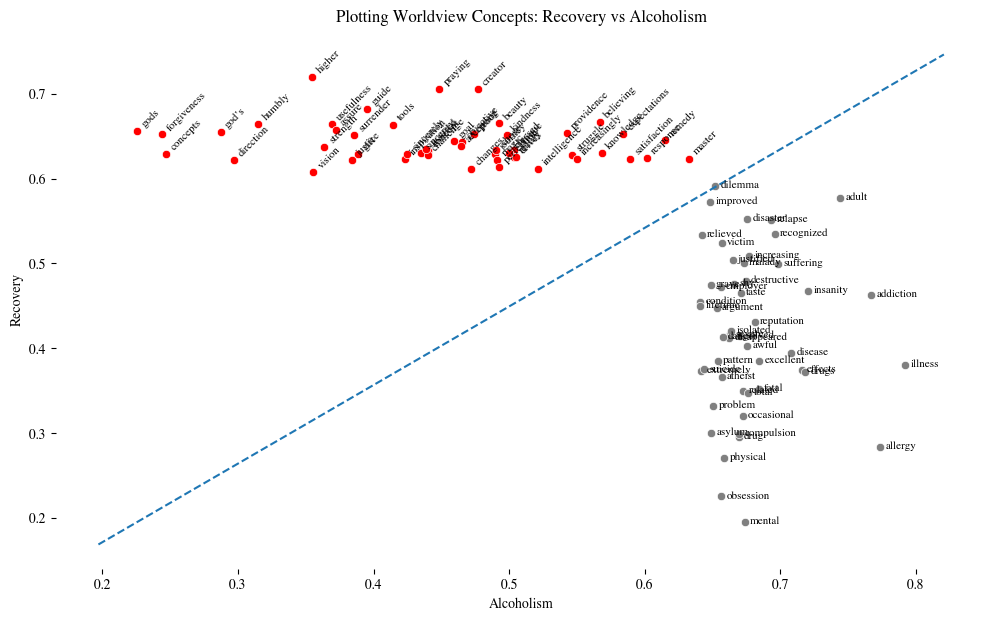

In [72]:
fig, ax = plt.subplots(figsize=(12,7))

#annotating each point for each scatterplot, and revealing the alcoholism falls far along the x axis and recovery 
# falls along the y. I attempted to move the labels around, but I am unable to get them to stop overlapping. 
# figuring out how to adjust the annotation labels is my next project.
sns.scatterplot(x = x1, y = y1, color="grey")
color="red"
for i in range(len(x1)):
    plt.annotate(tokens1[i], (x1[i]+0.004, y1[i]-0.002), fontsize = 8, family='times', rotation='0')

sns.scatterplot(x = x2, y = y2, color="red")
for i in range(len(x2)):
    plt.annotate(tokens2[i], (x2[i]+0.002, y2[i] + 0.005), fontsize = 8, family='times', rotation='45', label='multialignment')
    
#removing spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#including a title
plt.title("Plotting Worldview Concepts: Recovery vs Alcoholism", family='times', fontweight="bold") #setting title


plt.xlabel('Alcoholism', fontsize=10, family='times') #x is the alcoholism variable
plt.xticks(fontsize=10, family='times') #set font on x-axis

plt.ylabel('Recovery', fontsize=10, family='times') #y is the recovery variable
plt.yticks(fontsize=10, family='times') #set font on x-axis

plt.plot(ax.get_xlim(), ax.get_ylim(), '--')

In [79]:
model.most_similar('recovery') #pulling out the most similar words related to recovery in the AA worldview

[('practicing', 0.6849358677864075),
 ('program', 0.6628692746162415),
 ('remaining', 0.6430806517601013),
 ('journey', 0.6415169835090637),
 ('changes', 0.6384887099266052),
 ('substance', 0.6375330686569214),
 ('tools', 0.6330499053001404),
 ('practiced', 0.6315151453018188),
 ('entire', 0.6232205033302307),
 ('approach', 0.621910572052002)]

In [80]:
model.most_similar('alcoholism')# pulling out the most similar words related to alcoholism in the AA worldview

[('illness', 0.7577320337295532),
 ('disease', 0.7484878301620483),
 ('suffering', 0.716445803642273),
 ('fatal', 0.6863232254981995),
 ('malady', 0.6623083353042603),
 ('addiction', 0.6613667011260986),
 ('allergy', 0.6514995098114014),
 ('mental', 0.6501731872558594),
 ('physical', 0.649107813835144),
 ('behavior', 0.637294590473175)]

### Interpretation:

My initial feelings were shock. From years of personal experience in the program, I immediately felt like the most central concepts related to the world view of AA was spot on. Though the scatterplot has a lot of overlapping annotations, the words that are present highlight that recovery, as a worldview, depends upon reliance upon God, higher (often in relation to a higher power), forgiveness, service, humility, direction, believing, surrender, usefulness, among many other central themes within the rooms of AA. Each of these is related to AA as a spiritual program which depends upon three legacies - service (volunteer work), fellowship (among members of AA and other groups), and recovery (the program of AA based on 12 steps and 12 traditions). When looking at the most similar terms to recovery, many phrases central to the program are present. For one, it is conceived of as a program that one should remain in. It is often talked about as a wonderful journey that leads to changes in mind, body, and spirit which relieves the need for substances, which is achieved through completing all 12 steps in their entirety. Really fascinating what this model turned out. From the scatterplot, the program theoretically provides all the 'tools' necessary to live a sober life. I found it interesting that both struggle, on the recovery side, and dilemma, on the alcoholism side, fell closely to the middle of our recovery/alcoholism divide, as these two concepts are often framed as transitional terms in one's trajectory through recovery or relapse. When considering the alcoholism side of the scatterplot, the central aspects of alcoholism as a tripart disease which manifests as spiritual sickness sustained through physical craving as a result of an allergy to alcohol which leads to a mental obsession, fostering alcohol use. This is clearly defined within the worldview presented. It is also presented as a fatal malady caused by suffering. In earlier analyses, specific emotions, guilt and pride, were presented as the main emotions contributing to alcohol consumption. Though I did not consider these as central to the program, the model found them as essential to sustained alcohol misuse. 

### Future:
Moving forward, I would incorporate additional data from the AA Grapevine into my analysis. It would simply sharpen the focus of the worldview while bringing a more general view, as the Grapevine is written by members for a more general public and for light reading. I would also look for specific topics through topic modeling. I would mostly do this to test my word2vec model and triangulate my understanding of this worldview to the model itself as a way to validate my findings. I could then use these topics to also test the model by using analogy tests which I could create using the topics from my topic model analysis. Lastly, I would begin test my model by incorporating each set of data and then analyzing changes in vector scores related to specific words. I would attempt to find a specifc standard for what acceptable variation is when incorporating data into a model, and if one set of data changed the vectors substantially, I would try to understand why this occured, and report this. In this way, I would work to test in-model variation.

As the themes in my data are closely related to religious programs, I plan to investigate rhetoric surrounding prohibition developed from religious bodies and key religious figures during the prohibition era to determine the similarity among prohibitionist worldviews and those worldviews in AA. The main reason for this aspect is to determine how societal social movements may galvinize the creation of social programs aimed at similar ends, in this case, the end of alcohol use through leveraging worldviews.

### Ethical Considerations

In this study, I gathered data from open access websites and from texts that are available across North America and around the world. Though some of the central themes relate to worldviews of particular indivdiuals, by investigating concepts' relation to other words in contexts through word embeddings, no identifying features are accessible. This is a low risk study as no harm should come from it.